In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

font = {'size': 16}
# matplotlib.rc('font', **font)

%matplotlib inline

np.random.seed(1234)

### until now: 'bag of words assumption', but text has structure!


# Language Models I

- ### Text contains a lot of information
    - ### Find a way to model it (word counts, syntactics, semantics, etc)
    - ### Use huge amounts of text

- ### Gray area between unsupervised <-> supervised

- ### These are the building blocks for algorithms like GPT-4

# $ \\ $
# $ \\ $
# $ \\ $

# Common Tasks for a Language Model
## 1) Associate a probability with text
- ### eg P(real sentence) vs P(not a real sentence)

## 2) For a given text predict the next word (GPT) - can we predict the 'future'?
- ### eg "It's raining today so i should bring an `<?>`"

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


# Questions
- ### Why is this enough for gpt?
- ### What's the limit? (causality)
- ### Is this (un)supervised? (this gray area will become even blurrier once we learn about neural networks)

# $ \\ $
# $ \\ $
# $ \\ $

# Examples:

# Translation: German -> English

## "Gestern habe ich beim MIT einen burger gegessen."
## "Hier, j'ai mangé un hamburger au MIT"

##

##

>### Yesterday have I at MIT a burger eaten.
>### <small>(Score 21%)</small>

## vs

>### Yesterday I ate an MIT at a burger.
>### <small>(Score 65%)</small>

## vs

>### Yesterday I ate a burger at MIT.
>### <small>(Score 92%)</small>

# $ \\ $
# $ \\ $
# $ \\ $

# Speech Recognition:

>### How to wreck a nice beach

## vs

>### How to recognize speech

# $ \\ $
# $ \\ $
# $ \\ $

# Search:

<div>
<img src="GoogleSearch.png" width="500px"/>
</div>

# $ \\ $
# $ \\ $
# $ \\ $

## Language Models are used everywhere.
## Today we will learn how we can use the concept of n-gram approxmiations & counting to create such models

##

## -> More to come: "Language models II: RNN neural, write whole novels"

# $ \\ $
# $ \\ $
# $ \\ $

## Find next word:

## $P(\text{word}|\text{history}) = ?$

##

### $P(\text{word}|\text{"I go to the beach to"})$
- ### run?
- ### swim?
- ### printer?

## What is the naive solution here?

# $ \\ $
# $ \\ $
# $ \\ $

## Compare probability of all possible sentence completions!

### Counts(I go to the beach to *run*)
### - vs
### Counts(I go to the beach to *swim*)
### - vs
### Counts(I go to the beach to *printer*)

# $ \\ $
# $ \\ $
# $ \\ $

## However...

# $ \\ $
# $ \\ $
# $ \\ $

<div>
<img src="Google2.png" width="800px"/>
</div>

## Language is creative, so realistically we need to improve on basic counting.

## How can we do this?

# $ \\ $
# $ \\ $
# $ \\ $

## -> N-gram approximation

# $ \\ $
# $ \\ $
# $ \\ $

## Some notation

- ### A sentence with n words $w_1, w_2, ..., w_n$ = $w_1^n$
- ### Each word is a random variables over a vocabulary $w \in vocab$ where $len(vocab) = V$

### Chain rule of probability - Probability of sentence
- ### $P(w_1^n) =P(w_1)P(w_2|w_1)P(w_3|w_1^2)...P(w_n|w_1^{n-1})=\displaystyle\prod_{k=1}^{n}P(w_k|w_1^{k-1})$

# $ \\ $
# $ \\ $
# $ \\ $

## Simplest Approximation: independent unigrams
### $P(w_k|w_1^{k-1})≈P(w_k)$
### $P(w_k) = \frac{C(w_k)}{\sum C(w_j)} = \frac{C(w_k)}{N}$ where $N$ is the number of words in a training corpus

##

### What is the next logical step?

# $ \\ $
# $ \\ $
# $ \\ $

## General Approximation: use history of up to N tokens for each estimate.

### Note: This can be seen as a Markov model (limited history determins the probability)

## eg: 2-gram model:
### $P(w_k|w_1^{k-1})≈P(w_k|w_{k-1})$

# $ \\ $
# $ \\ $
# $ \\ $

## How do we estimate the probability of a word in a bigram model $𝑃(𝑤_𝑘|𝑤_{𝑘−1})$?
## Counts of bigram $w_{k-1}w_k$, divided by number of all bigrams starting with $w_{k-1}$

## $𝑃(𝑤_𝑘|𝑤_{𝑘−1})=\frac{C(w_{k-1}w_k)}{\sum_{w'}C(w_{k-1}w'_k)}$

## Number of bigrams starting with $w_{k-1}$ simplifies to number of unigrams $w_{k-1}$

## $𝑃(𝑤_𝑘|𝑤_{𝑘−1})=\frac{C(w_{k-1}w_k)}{C(w_{k-1})}$

# $ \\ $
# $ \\ $
# $ \\ $

## Calculation Example - bigrams

### Note: we want to keep track of beginning/end of sentences. Introduce `<s>` \& `</s>`.

### Train corpus:

- ### \<s\> I am Sam \</s\>
- ### \<s\> Sam I am \</s\>
- ### \<s\> I do not like green eggs and ham \</s\>

### $$P(\text{I}|\text{<s>})=\frac{2}{3}=.67 \hskip 2em P(\text{Sam}|\text{<s>})=\frac{1}{3}=.33 \hskip 2em P(\text{am}|\text{I})=\frac{2}{3}=.67$$
### $$P(\text{</s>}|\text{Sam})=\frac{1}{2}=.50 \hskip 2em P(\text{Sam}|\text{am})=\frac{1}{2}=.50 \hskip 2em P(\text{do}|\text{I})=\frac{1}{3}=.33$$

### $$P(\text{"I am Sam"}) = P(\text{I}|\text{<s>}) ~ \times ~ P(\text{am}|\text{I}) ~ \times ~...$$

# $ \\ $
# $ \\ $
# $ \\ $

## Larger corpus

In [5]:
# ignore this code for now, we will get back to it later
import pandas as pd
import numpy as np
import re
from collections import Counter
wiki_df = pd.read_csv('kdwd_r1k_articles.csv')
def get_tokens(text):
    return ['<s>'] + re.findall(r'\w+', text.lower()) + ['</s>']
sentences_list = ' '.join(wiki_df['intro_text'].tolist()).split('.')
full_token_list = [get_tokens(text) for text in sentences_list]
unigram_counts = Counter()
for token_list in full_token_list:
    for t in token_list:
        unigram_counts[t] += 1
bigram_counts = Counter()
for token_list in full_token_list:
    for t1, t2 in zip(token_list, token_list[1:]):
        bigram_counts[t1 + ' ' + t2] += 1
def get_mat(sentence, do_norm=False):
    tokens = get_tokens(sentence)
    mat_counts = np.zeros((len(tokens), len(tokens)))
    for n1, t1 in enumerate(tokens):
        for n2, t2 in enumerate(tokens):
            if do_norm:
                mat_counts[n1, n2] = bigram_counts[t1 + ' ' + t2] / unigram_counts[t1]
                df = pd.DataFrame(mat_counts, index=tokens, columns=tokens).round(5)
            else:
                mat_counts[n1, n2] = int(bigram_counts[t1 + ' ' + t2])
                df = pd.DataFrame(mat_counts, index=tokens, columns=tokens).astype(int)
    return df

In [6]:
def get_mat(sentence, do_norm=False):
    tokens = get_tokens(sentence)
    mat_counts = np.zeros((len(tokens), len(tokens)))
    for n1, t1 in enumerate(tokens):
        for n2, t2 in enumerate(tokens):
            if do_norm:
                mat_counts[n1, n2] = bigram_counts[t1 + ' ' + t2] / unigram_counts[t1]
                df = pd.DataFrame(mat_counts, index=tokens, columns=tokens).round(5)
            else:
                mat_counts[n1, n2] = int(bigram_counts[t1 + ' ' + t2])
                df = pd.DataFrame(mat_counts, index=tokens, columns=tokens).astype(int)
    return df

def get_tokens(text):
    return ['<s>'] + re.findall(r'\w+', text.lower()) + ['</s>']

In [7]:
sentence = 'wayfair has offices throughout the united states'
get_mat(sentence)

,<s>,wayfair,has,offices,throughout,the,united,states,</s>
<s>,0,2,5,1,2,918,9,10,13
wayfair,0,0,1,0,0,0,0,0,0
has,0,0,0,14,0,3,0,0,1
offices,0,0,0,0,3,0,0,0,2
throughout,0,0,0,0,0,37,0,0,0
the,0,0,0,0,0,0,274,1,0
united,0,0,0,0,0,0,0,393,0
states,0,0,0,0,0,9,2,0,136
</s>,0,0,0,0,0,0,0,0,0


In [8]:
sentence = 'wayfair has offices throughout the united states'
get_mat(sentence, do_norm=True).round(3)

,<s>,wayfair,has,offices,throughout,the,united,states,</s>
<s>,0.0,0.0,0.001,0.000,0.000,0.153,0.002,0.002,0.002
wayfair,0.0,0.0,0.250,0.000,0.000,0.000,0.000,0.000,0.000
has,0.0,0.0,0.000,0.038,0.000,0.008,0.000,0.000,0.003
offices,0.0,0.0,0.000,0.000,0.039,0.000,0.000,0.000,0.026
throughout,0.0,0.0,0.000,0.000,0.000,0.771,0.000,0.000,0.000
the,0.0,0.0,0.000,0.000,0.000,0.000,0.056,0.000,0.000
united,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.887,0.000
states,0.0,0.0,0.000,0.000,0.000,0.020,0.004,0.000,0.302
</s>,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000


### $$P(\text{<s>} ~ \text{wayfair has offices throughout the united states} ~ \text{</s>})$$
### $$= P(\text{wayfair}|\text{<s>}) \times P(\text{has}|\text{wayfair}) \times P(\text{offices}|\text{has}) \times ~... $$
### $$= 0.00033 \times 0.25000 \times 0.03763 \times ~... $$
### $$= 0.00000... $$

# $ \\ $
# $ \\ $
# $ \\ $

## Some of these probabilities quickly get very small -> use logarithm

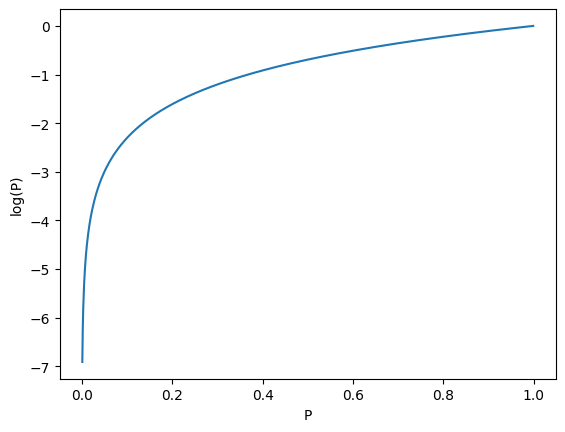

In [9]:
# plt.figure(fontsize=16)
plt.plot(np.arange(0,1,0.001)[1:], np.log(np.arange(0,1,0.001)[1:]))
plt.xlabel('P')
plt.ylabel('log(P)');

- ## Convenient to deal with small numbers and multiplications become sums

# $ \\ $
# $ \\ $
# $ \\ $

## Before we build our first language model, how will we evaluate it?

# $ \\ $
# $ \\ $
# $ \\ $

## 1. Downstream task (extrinsic)

### The best judge of a language model is its benefit in another task.

### For example:

- ### Does our translation output improve by using a language model?
- ### Can we classify spam better by using a language model?

# $ \\ $
# $ \\ $
# $ \\ $

## 2. Perplexity (intrinsic)

##

##

##  Definition: inverse probability of a test set
### aka: Measure on how likely an unseen text is under a specific Language Model

## $PP(W) = P(w_1...w_N)^{-\frac{1}{N}}$

- ### lower perplexity is better

##

##

## using chainrule we get

### unigrams: $PP(W) = (\displaystyle\prod_{k=1}^{N}\frac{1}{P(w_k)})^{\frac{1}{N}}$

### bigrams: $PP(W) = (\displaystyle\prod_{k=1}^{N}\frac{1}{P(w_k|w_{k-1})})^{\frac{1}{N}}$

##

##

### Pros:
- #### simpler, doesn't need a task

### Cons:
- #### inapplicable to unnormalized language models (i.e., models that are not true probability distributions that sum to 1)
- #### not comparable between language models with different vocabularies

##

##

### we can use this as an 'unsupervised' proxy on how useful our model will be in a downstream task.

##

#### [more reading] (optional) https://towardsdatascience.com/perplexity-in-language-models-87a196019a94

# $ \\ $
# $ \\ $
# $ \\ $

## Building an n-gram language model

In [10]:
import pandas as pd
import numpy as np
import re

wiki_df = pd.read_csv('kdwd_r1k_articles.csv')

def get_tokens(text):
    return ['<s>'] + re.findall(r'\w+', text.lower()) + ['</s>']

train_sentences_list = ' '.join(wiki_df['intro_text'].iloc[:-100].tolist()).split('.')
test_sentences_list = ' '.join(wiki_df['intro_text'].iloc[-100:].tolist()).split('.')

In [11]:
from collections import Counter

train_token_list = [get_tokens(text) for text in train_sentences_list]

unigram_counts = Counter()
for token_list in train_token_list:
    for t in token_list:
        unigram_counts[t] += 1

bigram_counts = Counter()
for token_list in train_token_list:
    for t1, t2 in zip(token_list, token_list[1:]):
        bigram_counts[t1 + ' ' + t2] += 1

In [12]:
unigram_counts.most_common(10)

[('<s>', 5322),
 ('</s>', 5322),
 ('the', 4349),
 ('and', 3751),
 ('in', 3313),
 ('of', 2165),
 ('company', 1657),
 ('is', 1504),
 ('a', 1175),
 ('to', 960)]

In [13]:
bigram_counts.most_common(10)

[('the company', 855),
 ('<s> the', 812),
 ('in the', 648),
 ('of the', 504),
 ('inc </s>', 394),
 ('<s> in', 378),
 ('is an', 374),
 ('<s> it', 369),
 ('united states', 350),
 ('an american', 345)]

In [14]:
n_unigrams = np.sum([v for _, v in unigram_counts.items()])

def get_unigram_token_prob(token):
    return unigram_counts[token] / n_unigrams

In [15]:
get_unigram_token_prob('the')

0.04554355907886607

In [16]:
get_unigram_token_prob('apple')

0.0004607764082478977

In [17]:
def get_text_prob_unigram(text):
    tokens = get_tokens(text)
    logp = 0
    for t in tokens[1:-1]:
        logp += np.log(get_unigram_token_prob(t))
    return logp

In [18]:
get_text_prob_unigram('apple inc')

-13.125937335501064

In [19]:
get_text_prob_unigram('inc apple')

-13.125937335501064

In [20]:
get_text_prob_unigram('apple steve')

-17.357625459234043

In [21]:
def get_bigram_token_prob(token1, token2):
    return bigram_counts[token1 + ' ' + token2] / unigram_counts[token1]

In [22]:
def get_text_prob_bigram(text):
    tokens = get_tokens(text)
    logp = 0
    for t1, t2 in zip(tokens[1:-1], tokens[2:]):
        logp += np.log(get_bigram_token_prob(t1, t2))
    return logp

In [23]:
get_text_prob_bigram('apple inc')

-2.4449919564614695

In [24]:
get_text_prob_bigram('inc apple')

/var/folders/n7/btm17_wx4qbd75mnb8jvst6w0000gn/T/ipykernel_62993/1581132757.py:5: RuntimeWarning: divide by zero encountered in log
  logp += np.log(get_bigram_token_prob(t1, t2))


-inf

## There is a problem that we have glossed over

In [25]:
get_text_prob_unigram('dolphin')

/var/folders/n7/btm17_wx4qbd75mnb8jvst6w0000gn/T/ipykernel_62993/1322820601.py:5: RuntimeWarning: divide by zero encountered in log
  logp += np.log(get_unigram_token_prob(t))


-inf

## We get a probability of 0 for unknown unigrams! This will make all text have probability 0!
## Same for bigrams, so even closed/giant vocabulary doesn't help.

## How do we prevent this?

# $ \\ $
# $ \\ $
# $ \\ $

## Add count 1 to everything, keep normalized
### This is also known as "Laplace smoothing"

In [26]:
def get_unigram_token_prob(token):
    return (unigram_counts[token] + 1) / (n_unigrams + len(unigram_counts))

def get_bigram_token_prob(token1, token2):
    return (bigram_counts[token1 + ' ' + token2] + 1) / (unigram_counts[token1] + len(unigram_counts))

In [27]:
get_text_prob_bigram('dolphin')

-9.174298600628918

In [28]:
get_text_prob_bigram('apple sky')

-18.353873731733426

### evaluate perplexity

#### reminder, for bigrams:
$PP(W) = (\displaystyle\prod_{k=1}^{N}\frac{1}{P(w_k|w_{k-1})})^{\frac{1}{N}}$

In [29]:
def get_text_ppl_unigram(text):
    tokens = get_tokens(text)
    n_tokens = len(tokens)
    logp = 0
    for t in tokens[1:-1]:
        logp += np.log(get_unigram_token_prob(t))
    return (1 / np.exp(logp))**(1 / n_tokens)

def get_text_ppl_bigram(text):
    tokens = get_tokens(text)
    n_tokens = len(tokens)
    logp = 0
    for t1, t2 in zip(tokens, tokens[1:-1]):
        logp += np.log(get_bigram_token_prob(t1, t2))
    return (1 / np.exp(logp))**(1 / n_tokens)

### Let's look at a common phrase in our (small) training data

In [30]:
get_unigram_token_prob('exploration')

0.00025680778412927893

In [31]:
get_bigram_token_prob('hydrocarbon', 'exploration')

0.0011391880695940347

In [32]:
get_text_ppl_unigram('is a company engaged in hydrocarbon exploration.')

108.80734521775413

In [33]:
get_text_ppl_bigram('is a company engaged in hydrocarbon exploration.')

92.31064151724841

### Not surprisingly our bigram model does better.

### What if we look at our whole test set?

In [34]:
ppl_list = []
for text in test_sentences_list:
    ppl_list.append(get_text_ppl_unigram(text))
np.mean(ppl_list)

604.5126361852824

In [35]:
ppl_list = []
for text in test_sentences_list:
    ppl_list.append(get_text_ppl_bigram(text))
np.mean(ppl_list)

892.5030633621313

## The bigram model perplexity for our test set is actually higher! (overfit)

## -> Depending on train data size, vocabulary size, n-gram choice, the results here are a decent guideline, but nothing really substitues extrinsic (on-task) evaluation.

# $ \\ $
# $ \\ $
# $ \\ $

## Example plots for large-scale datasets:

![PerplexityFromGoog.png](attachment:image.png)

<div style="text-align: right"><small> [ref] deliprao.com/archives/201</small></div>
    
- ### more training data is better
- ### higher ngram is better, usually up to a point (overfitting)

# $ \\ $
# $ \\ $
# $ \\ $

![image.png](SOTANLP.png)
<div style="text-align: right"><small>[ref] paperswithcode</small></div>

- ## SOTA drastically improved over the past few years

# $ \\ $
# $ \\ $
# $ \\ $

## Returning to our problem of unknown word: P(unigram)=0

## Adding +1 to every token was a simple way to prevent 0.

##

## How else can we handle unknown words in test?
## or: How do we get a good estimate for how common they are?

# $ \\ $
# $ \\ $
# $ \\ $

<div>
<img src="UnknownWord1.png" width="600px"/>
</div>

# $ \\ $
# $ \\ $
# $ \\ $

## Make dedicated Token \<unk\> for rare words in train

<div>
<img src="UnknownWord2.png" width="600px"/>
</div>

# $ \\ $
# $ \\ $
# $ \\ $

## Is there something smarter we can do for unknown n-grams?

## Eg: "computer science": P(bigram)=0?

# $ \\ $
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $

## Backoff (see Homework)

## Estimate bigram probability via unigram probability

### eg bigram $P(w_k|w_{k-1})$ has count 0 so we approximate with unigram $P(w_k)$

# $ \\ $
# $ \\ $
# $ \\ $

## Public use of n-gram models

![image.png](GoogleNGram.png)

# $ \\ $
# $ \\ $
# $ \\ $

## Kenlm - An integrated n-gram LM framework

### `pip install https://github.com/kpu/kenlm/archive/master.zip`

- ### easy building of model
- ### advanced smoothing
- ### fast, small memory footprint, optimized for querying

In [42]:
# Install kenlm package
!pip install kenlm
import kenlm

zsh:1: /usr/local/bin/pip: bad interpreter: /usr/local/opt/python@3.11/bin/python3.11: no such file or directory


### 4-gram model, 200k vocab - 11Gb

In [43]:
# https://dl.fbaipublicfiles.com/wav2letter/lexicon_free/librispeech/models/lm/lm_librispeech_kenlm_word_4g_200kvocab.bin

In [44]:
model = kenlm.Model('lm_librispeech_kenlm_word_4g_200kvocab.bin')

In [46]:
%%time
sentence = """
After adding nearly 27 million new paying subscribers in the first six months of 2020, Netflix warned investors to brace for a slowdown. Analysts expect only 3.8 million new paid subscribers for the third quarter when Netflix reports results Tuesday afternoon. That would mark its lowest quarterly pickup in more than a year
""".lower()
print("Sentence score:", model.score(sentence), "\n\n")

Sentence score: -208.19174194335938 


CPU times: user 543 μs, sys: 142 μs, total: 685 μs
Wall time: 1.82 ms


### Example: sentence likelihood

In [47]:
sentence = "ate yesterday burger at i a mit"
model.score(sentence)

-33.94782638549805

In [48]:
sentence = "yesterday i ate a mit at burger"
model.score(sentence)

-27.17040252685547

In [49]:
sentence = "yesterday i ate a burger at mit"
model.score(sentence)

-25.033166885375977

In [50]:
sentence = "I went to the beach to food"
model.score(sentence)

-23.912525177001953

### Example: predict next word

In [51]:
model.score("wet")

-6.967015266418457

In [52]:
model.score("red")

-6.306774616241455

### `"red"` is more likely than `"wet"`

### What if we try to complete the sentence: "ocean water is"
### `"wet"` more likely than `"red"`?

In [53]:
sentence = "ocean water is"
for token in ["wet", "red", "desktop", "xyz..."]:
    print(token, model.score(sentence + " " + token))

wet -14.039976119995117
red -15.215217590332031
desktop -19.074228286743164
xyz... -20.774600982666016


# $ \\ $
# $ \\ $
# $ \\ $

## Optional continued reading

- ### Kneser-Ney Smoothing
    - #### http://smithamilli.com/blog/kneser-ney/

- ### Kenlm
    - #### https://kheafield.com/code/kenlm/
    - #### https://www.aclweb.org/anthology/P13-2121.pdf

# $ \\ $
# $ \\ $
# $ \\ $